In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import numpy as np
import tensorflow as tf
import h5py
import pandas as pd
import seaborn as sns
from scipy import stats

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, Reshape, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.utils import to_categorical

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

Using TensorFlow backend.


##### Testing data

In [5]:
def get_class_data(class_name):
    global class_counts_test
    
    path_test = os.path.join(test_path, class_name)
    class_units_test = np.fromfile(path_test, dtype=int, count=-1, sep=' ', offset=0)
    units_test = np.split(class_units_test, class_units_test.size // 1080, 0) # 1080 = 3 sec * 360Hz
    class_counts_test[class_name] = class_units_test.size // 1080
    
    return units_test

In [6]:
base_path = 'C:\\cygwin\\home\\User\\1studing\\wfdb\\GettingData\\cnn_code'
test_path = os.path.join(base_path, 'data_files_test')
model_save_path = os.path.join(base_path, 'model\\cnn_model.h5')
model_weights_path = os.path.join(base_path, 'model\\cnn_model_weights.hdf5')

classes = ['N', 'LBBB', 'RBBB', 'B', 'T', 'VT', 'SVTA', 'AFIB', 'AFL', 'NOD', 'IVR', 'V']
class_mapping = {'N': 0, 'LBBB': 1, 'RBBB': 2, 'B': 3, 'T': 4, 'VT': 5, 'SVTA': 6, 'AFIB': 7, 'AFL': 8, 'NOD': 9, 'IVR': 10, 'V': 11}
class_counts_test = {'N': 0, 'LBBB': 0, 'RBBB': 0, 'B': 0, 'T': 0, 'VT': 0, 'SVTA': 0, 'AFIB': 0, 'AFL': 0, 'NOD': 0, 'IVR': 0, 'V': 0}

X_test = []
Y_test = []

for class_i in classes:
    class_units_test = get_class_data(class_i)
    Y_test  += [class_mapping[class_i]] * class_counts_test[class_i]
    X_test += class_units_test

#print('X_test')
#print(X_test)

In [8]:
def feature_normalize(dataset):

    mu = np.mean(dataset)
    sigma = np.std(dataset)
    
    return (dataset - mu) / sigma

##### Testing

In [9]:
XX_test = np.asarray(X_test)
YY_test = np.asarray(Y_test)
XX_test = XX_test.astype("float32")
YY_test = YY_test.astype("float32")

XXX_test = feature_normalize(XX_test)

num_classes = 12
YY_test = to_categorical(YY_test, num_classes)

model_test = load_model(model_save_path)
model_test.load_weights(model_weights_path) 

BATCH_SIZE = 400

score = model_test.evaluate(XXX_test, YY_test, batch_size = BATCH_SIZE, verbose=2)

print("\nAccuracy on test data: %0.2f" % score[1])
print("\nLoss on test data: %0.2f" % score[0])

7926/1 - 54s - loss: 2.8125 - accuracy: 0.7338

Accuracy on test data: 0.73

Loss on test data: 0.88


##### Predicting on test data

In [10]:
def show_confusion_matrix(validations, predictions):
    
    #print(metrics.confusion_matrix(validations, predictions, LABELS))
    #print()

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(12, 12))
    sns.heatmap(matrix,
                cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()


--- Confusion matrix for test data ---



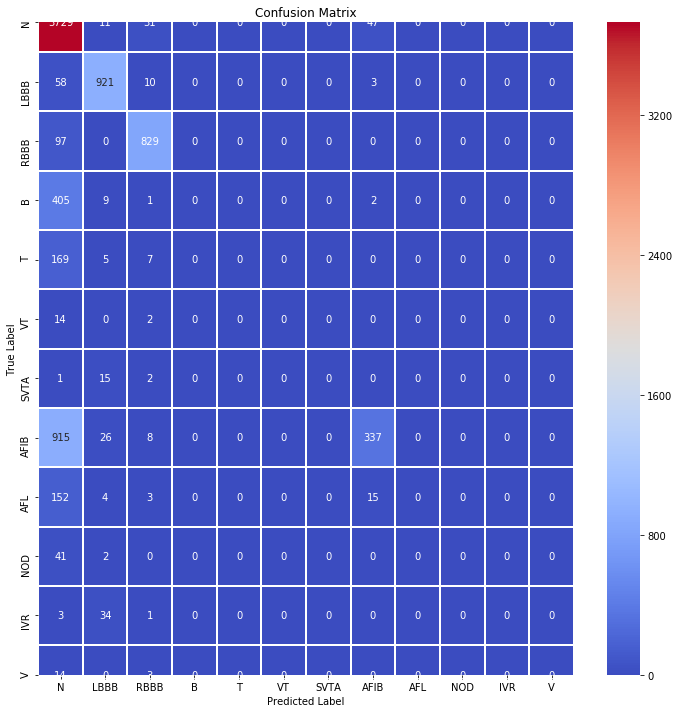

In [11]:
print("\n--- Confusion matrix for test data ---\n")

LABELS = ["N", "LBBB", "RBBB", "B", "T", "VT", "SVTA", "AFIB", "AFL", "NOD", "IVR", "V"]

Y_pred_test = model_test.predict(XXX_test)

max_Y_pred_test = np.argmax(Y_pred_test, axis=1)
max_Y_test = np.argmax(YY_test, axis=1)

show_confusion_matrix(max_Y_test, max_Y_pred_test)

#print("\n--- Classification report for test data ---\n")
#print(classification_report(max_Y_test, max_Y_pred_test))


--- Confusion matrix for test data ---

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
--------------
[ 0  0  0  0  1  2  3  7  0 11]
--------------
[0 0 0 0 1 2 0 0 0 0]


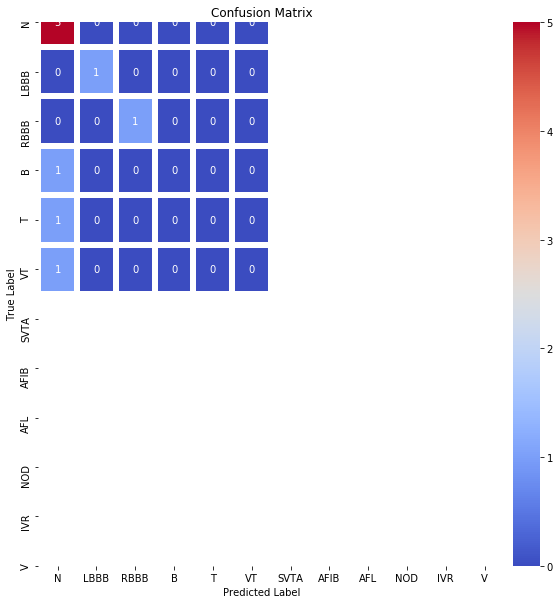

In [110]:
print("\n--- Confusion matrix for test data ---\n")

temp_rand = np.arange(7926)
#np.random.shuffle(temp_rand)
#temp_part_rand = temp_rand[:10]
temp_part_rand = temp_rand[np.array([0,1000,2000,3000,4000,5000,6000,7000,2500,7920])]

XXX_part_test = XXX_test[temp_part_rand, :1080]
Y_part_test = YY_test[temp_part_rand]

Y_part_pred_test = model_test.predict(XXX_part_test)

max_Y_part_pred_test = np.argmax(Y_part_pred_test, axis=1)
max_Y_part_test = np.argmax(Y_part_test, axis=1)

print(Y_part_test)
print('--------------')
print(max_Y_part_test)
print('--------------')
print(max_Y_part_pred_test)

show_confusion_matrix(max_Y_part_test, max_Y_part_pred_test)

##### Partial predicting

##### Predicting on external data

In [14]:
base_path = 'C:\\cygwin\\home\\User\\1studing\\wfdb\\GettingData\\cnn_code'
predict_path = os.path.join(base_path, 'data_files_predict')

class_name = '207'
path_predict = os.path.join(predict_path, class_name)
X_pred = np.fromfile(path_predict, dtype=int, count=-1, sep=' ', offset=0)

temp_predict = np.split(X_pred, X_pred.size // 1080, 0) 

XX_pred = np.asarray(temp_predict)
XX_pred = XX_pred.astype("float32")


X_predict = feature_normalize(XX_pred)

print(X_predict)
print('--------------------------------------')

Y_predict = model_test.predict_proba(X_predict)

print(len(Y_predict))

print(Y_predict)


#print("\n--- Confusion matrix for test data ---\n")

LABELS = ["N", "LBBB", "RBBB", "B", "T", "VT", "SVTA", "AFIB", "AFL", "NOD", "IVR", "V"]

Y_pred_test = model_test.predict(X_predict)

max_Y_pred_test = np.argmax(Y_pred_test, axis=1)
print(max_Y_pred_test)

[[ 0.988221    0.9235115   0.93968886 ...  0.35730335  0.3249486
   0.29259387]
 [ 0.24406174  0.22788437  0.26023912 ... -0.22508216 -0.2574369
  -0.30596903]
 [-0.28979164 -0.24125953 -0.22508216 ...  0.03375585 -0.04713102
  -0.07948577]
 ...
 [-0.8074677  -0.6618713  -0.54862964 ...  0.26023912  0.35730335
   0.40583548]
 [ 0.42201287  0.470545    0.5514319  ... -1.422208   -1.1471926
  -0.9045319 ]
 [-0.7265808  -0.59716177 -0.41921067 ... -1.8428197  -1.6972233
  -1.5516269 ]]
--------------------------------------
300
[[1.0845217e-02 9.6502286e-01 3.7455626e-04 ... 5.5386242e-04
  1.2582309e-04 6.7855918e-04]
 [7.2429413e-03 9.7100800e-01 4.6343947e-04 ... 6.2950153e-04
  1.7962775e-04 9.5154194e-04]
 [9.6254023e-03 9.6437430e-01 5.7887344e-04 ... 6.8925222e-04
  1.8331174e-04 9.6027140e-04]
 ...
 [1.5005486e-03 9.9118418e-01 4.0697961e-04 ... 1.2852675e-04
  3.4939909e-05 3.5898085e-04]
 [1.6860518e-03 9.9042952e-01 3.8769853e-04 ... 1.4001341e-04
  3.8843296e-05 3.7816746e-04]